# VaR - Value at Risk

## Definition
Potential loss of a financial asset or a portfolio for a trust level and a specific period.

There are 3 methods to compute VaR:
- Historical Simulation
- Variance-Covariance VaR
- Monte Carlo Simulation

## Historical Simulation
Get the historical financial yields, sort those financial yields and take the quantile corresponding to the trust level.

### Compute for 1 Asset

In [1]:
from datetime import date
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns

In [2]:
# Get data from Yahoo Finance for CW8 ETF
dat = yf.Ticker("CW8.PA")
# Print Name
dat.info['longName']

'Amundi Index Solutions - Amundi MSCI World UCITS ETF C EUR'

In [3]:
# Get data for a specific period
# replace by "period = max" to get all data
# and put result into dataframe
today = date.today().strftime("%Y-%m-%d")
df = dat.history(start='2022-01-01', end=today)

# Print tail of the dataframe
df.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Capital Gains
Date,,,,,,,,
2025-07-22 00:00:00+02:00,557.148193,557.913574,554.500122,555.143005,8017,0.0,0.0,0.0
2025-07-23 00:00:00+02:00,558.508789,560.499817,558.299988,559.756226,3620,0.0,0.0,0.0
2025-07-24 00:00:00+02:00,561.337585,562.255798,559.750000,560.994812,9183,0.0,0.0,0.0
2025-07-25 00:00:00+02:00,560.958618,562.446716,560.082275,562.080872,3923,0.0,0.0,0.0
2025-07-28 00:00:00+02:00,566.005981,567.500000,565.374329,566.783875,9792,0.0,0.0,0.0


In [4]:
# Create column Yield_return
# Use function pct_change that computes the fractional change between current and previous element to do it
df['yield_return'] = df['Close'].pct_change().dropna()
# To computer VaR we need to sort Yield value
df_sorted = df.sort_values(by='yield_return')
df_sorted

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Capital Gains,yield_return
Date,,,,,,,,,
2025-04-03 00:00:00+02:00,518.130676,521.133606,506.399994,511.153809,23464,0.0,0.0,0.0,-0.049131
2025-04-09 00:00:00+02:00,468.564301,473.851898,456.474091,466.432587,21379,0.0,0.0,0.0,-0.047044
2025-04-04 00:00:00+02:00,504.045807,505.296112,482.500000,487.880005,33294,0.0,0.0,0.0,-0.045532
2022-01-24 00:00:00+01:00,407.884094,408.857086,394.380005,395.134491,21288,0.0,0.0,0.0,-0.040540
2024-08-02 00:00:00+02:00,509.501099,510.082092,495.000092,496.610107,12875,0.0,0.0,0.0,-0.039840
...,...,...,...,...,...,...,...,...,...
2022-02-25 00:00:00+01:00,395.320007,402.694305,393.411499,402.694305,4336,0.0,0.0,0.0,0.031448
2025-05-12 00:00:00+02:00,540.088196,547.274780,539.562622,543.510620,11768,0.0,0.0,0.0,0.032785
2025-04-08 00:00:00+02:00,482.922485,497.624695,481.584015,489.458588,21315,0.0,0.0,0.0,0.034946


In [5]:
# Inputs data to compute Historical VaR
sorted_yield_returns = df_sorted['yield_return'].dropna()
alpha = 95/100
value_portfolio = 1000000

# Compute Historical VaR in percentage
# and value for a given portfolio of 1 000 000 EUR of CW8
var_hist_percent = np.percentile(sorted_yield_returns, (1 - alpha) * 100)
var_hist_value = var_hist_percent * value_portfolio

print('Historical VaR 95% in percent:' + str((var_hist_percent*100).round(2)) + '%')
print('Historical VaR 95% in value:' + str(var_hist_value.round(2)) + ' EUR')

# Display the VaR:
# print('Var 95% is : '+ (np.percentile(df_sorted['Yield'].dropna(), 5)*100).round(2).astype(str) + '%')

Historical VaR 95% in percent:-1.49%
Historical VaR 95% in value:-14879.08 EUR


### Conclusion
- There is a probability of 5% (1 - 95%) to lose more than -1.44% per day or to lose 14373,66 EUR for a portfolio of CW8 of 1 000 000 EUR.
- Or 95% of the time the loss will be inferior to -1.44% or inferior to 14373,66 EUR for a portfolio of CW8 of 1 000 000 EUR.

### Graphical representation

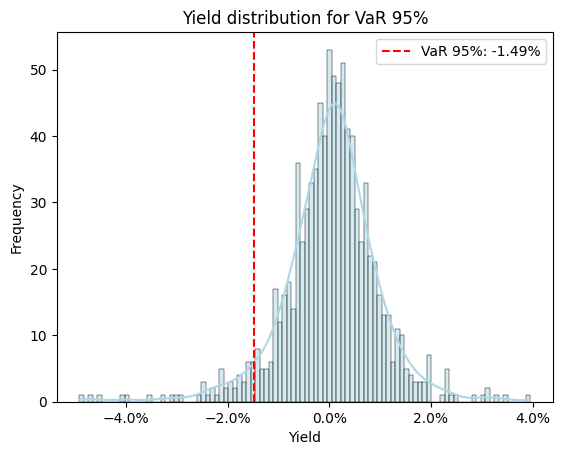

In [6]:
# Create graph
sns.histplot(df_sorted['yield_return'], bins=100, kde=True, color='lightblue')
var_95 = np.percentile(df_sorted['yield_return'].dropna(), 5)
plt.axvline(var_95, color='red', linestyle='--', label=f'VaR 95%: {var_95:.2%}')
plt.legend()
plt.title("Yield distribution for VaR 95%")
plt.xlabel("Yield")
plt.ylabel("Frequency")
plt.gca().xaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.show()

### Create reusalbe code
- Now let's create one function to do all the work for us in one call.
- Avoid hardcode.
- Use parameters.

VaR for: Amundi Index Solutions - Amundi MSCI World UCITS ETF C EUR
Var 95% is : -1.44%
This means there is a probability of 5% (100 - 95%) to lose more than -1.44% per day
Meaning 95% of the time the loss will be inferior to -1.44%


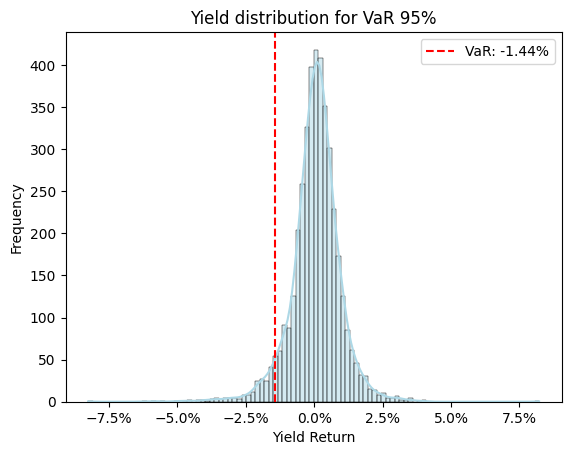

In [7]:
from finance_compute_helper import show_var_histo_report
show_var_histo_report("CW8.PA", 95)

VaR for: NVIDIA Corporation
Var 99% is : -9.35%
This means there is a probability of 1% (100 - 99%) to lose more than -9.35% per day
Meaning 99% of the time the loss will be inferior to -9.35%


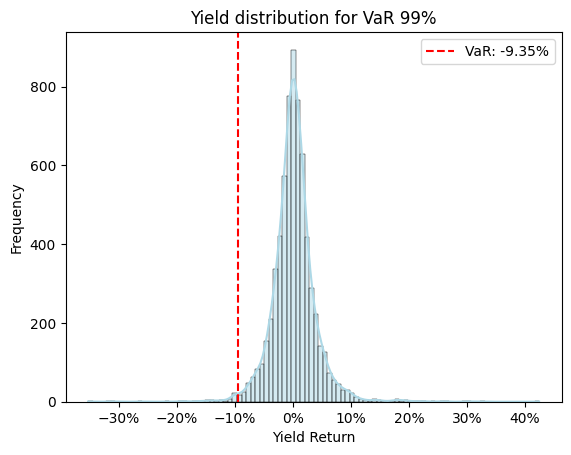

In [8]:
show_var_histo_report("NVDA", 99)

### Compute for N Assets
- Before we computed the VaR for 1 Asset only.
- But in a real situation a Portfolio has many Assets.

VaR for Portfolio: CW8.PA NVDA TSLA
Var 95% is : -3.03%
This means there is a probability of 5% (100 - 95%) to lose more than -3.03% per day
Meaning 95% of the time the loss will be inferior to -3.03%


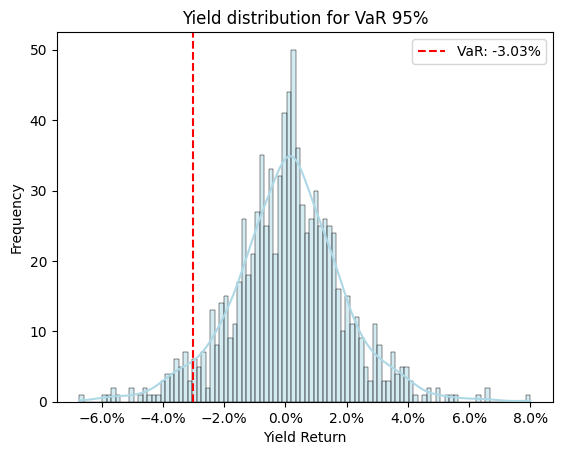

In [9]:
from finance_compute_helper import show_ptf_var_histo_report, ptf_yields_returns, compute_var_histo
from datetime import date

today = date.today().strftime("%Y-%m-%d")

portfolio_dict = {
    "CW8.PA": 50/100,
    "NVDA": 25/100,
    "TSLA": 25/100,
}

yield_returns, list_names = ptf_yields_returns(portfolio_dict,"2022-01-01",today)
show_ptf_var_histo_report(list_names, 95, yield_returns)

## Variance-Covariance VaR